1. pre-process the data by scaling/standardizing the 8 columns

# Understand the problem and read in the data

This Kaggle challenge is about predicting the onset of diabetes in 5 years or less. 
Target variable is Outcome. 1 = yes, the person became diabetic in 5 years, and 0 = No, 
the person did not. This is a binary classification problem. Please check out the Kaggle
link here to see feature 
details - https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

In [12]:
'''Import necessary packages'''
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.metrics import roc_curve,auc, roc_auc_score
from imblearn.over_sampling import SMOTE

%matplotlib inline

In [13]:
# Load Data from Google Drive
drive.mount('/content/drive')
data = open('/content/drive/MyDrive/dataset_INFO6105/pima-indians-diabetes.data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df = pd.read_csv(data,header = None)
print(df.shape)
df.head(2)

(768, 9)


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


# Pre-process data, train-test split

In [15]:
#Separate out X and Y
X = df.iloc[:, :8]
Y = df.iloc[:, 8:9]

In [16]:
X.count(), Y.count()

(0    768
 1    768
 2    768
 3    768
 4    768
 5    768
 6    768
 7    768
 dtype: int64, 8    768
 dtype: int64)

#### Data Augmentation

In [17]:
df3 = df.copy()
target = 8

print('Original class distribution:')
print(df3[target].value_counts())

xf = df3.columns
X_t = df3.drop([target],axis=1)
Y_t = df3[target]

smote = SMOTE()
X_t, Y_t = smote.fit_resample(X, Y)

df3 = pd.DataFrame(X_t, columns=xf)
df3[target] = Y_t

print('\nClass distribution after applying SMOTE Technique:',)
print(Y_t.value_counts())

Original class distribution:
0    500
1    268
Name: 8, dtype: int64

Class distribution after applying SMOTE Technique:
8
0    500
1    500
dtype: int64


#### Various other preprocessing techniques which I've commented. I've just used the MinMaxScaler for the implementation

1. MinMaxScaler
2. Normalizer
3. Binarizer
4. StandardScaler

In [18]:
# #StandardScaler
# transforms = StandardScaler()
# standardScale_X = transforms.fit_transform(X)
# print(standardScale_X)

# transforms = Normalizer()
# normalizer_x = transforms.fit_transform(X)
# print(normalizer_x)

# transforms = Binarizer(threshold=0.5)
# binarizer_x = transforms.fit_transform(X)
# print(binarizer_x)

In [19]:
#scale Features from 0 to 1
transforms = MinMaxScaler(feature_range=(0,1))
scaler_X =  transforms.fit_transform(X_t)
print(scaler_X)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.70588235 0.65829146 0.         ... 0.67733995 0.21136971 0.35      ]
 [0.05882353 0.74874372 0.55737705 ... 0.44298202 0.12301878 0.35      ]
 [0.35294118 0.75376884 0.60655738 ... 0.49436451 0.20638412 0.45      ]]


#### Split data into train, validation and test

In [20]:
df.shape

(768, 9)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(scaler_X, Y_t, test_size=0.15, random_state=1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=1)

In [22]:
print(X_train.shape,Y_train.shape,X_val.shape,Y_val.shape,X_test.shape,Y_test.shape)

(722, 8) (722, 1) (128, 8) (128, 1) (150, 8) (150, 1)


In [23]:
# # Train- Test Split
# (X_train, X_test, Y_train, Y_test) = train_test_split(scaler_X, Y, test_size=0.33, random_state=1)
# print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

# Build and compile a deep learning model

In [24]:
# Build the deep neural network
model = Sequential()
model.add(Dense(10, input_dim=8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
# Compile the DNN

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# Fit the DNN with your train data

history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=5)

Epoch 1/100
145/145 [==============================] - 1s 3ms/step - loss: 0.7207 - accuracy: 0.4903 - val_loss: 0.7097 - val_accuracy: 0.4609
Epoch 2/100
145/145 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.4529 - val_loss: 0.7006 - val_accuracy: 0.3594
Epoch 3/100
145/145 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.3615 - val_loss: 0.6966 - val_accuracy: 0.3828
Epoch 4/100
145/145 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4377 - val_loss: 0.6942 - val_accuracy: 0.5156
Epoch 5/100
145/145 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5083 - val_loss: 0.6911 - val_accuracy: 0.5547
Epoch 6/100
145/145 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5554 - val_loss: 0.6890 - val_accuracy: 0.5859
Epoch 7/100
145/145 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5914 - val_loss: 0.6823 - val_accuracy: 0.6172

#### Epoch vs Train/ Validation 

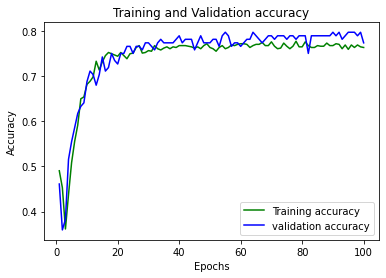

In [27]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
# Evaluate the model
scores = model.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores[1]*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7600
Accuracy: 76.00%


#### Model Evaluation
ROC vs AUC implementation using sklearn's roc_auc_score metrics

In [29]:
y_pred_prob_nn_1 = model.predict(X_test)

In [30]:
y_pred_prob_nn_1[:10]

array([[0.1778045 ],
       [0.66669977],
       [0.17961785],
       [0.01806697],
       [0.3738428 ],
       [0.7966547 ],
       [0.268863  ],
       [0.7436787 ],
       [0.4135582 ],
       [0.02972955]], dtype=float32)

In [31]:
print(roc_auc_score(Y_test,y_pred_prob_nn_1))

0.8579185520361992


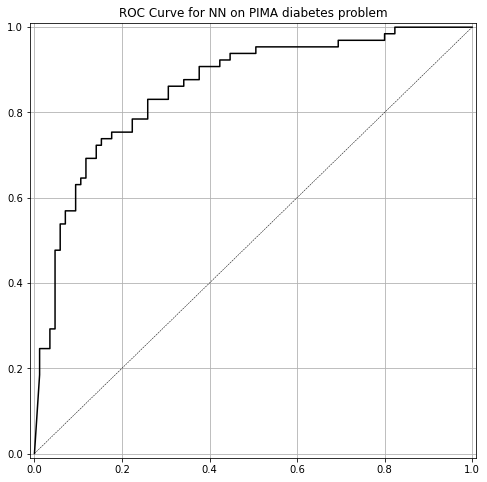

In [32]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
    
plot_roc(Y_test, y_pred_prob_nn_1, 'NN')